In [1]:
%matplotlib inline

import numpy as np
import skimage.io
import matplotlib.pyplot as plt

import keras.backend
import keras.callbacks
import keras.layers
import keras.models
import keras.optimizers

import helper.loss_functions

import tensorflow as tf

import functools

Using TensorFlow backend.


In [2]:
# set up config for GPU
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "2"
session = tf.Session(config = configuration)

# apply session
keras.backend.set_session(session)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


In [3]:
dim1 = 64
dim2 = 64

batch_size = 100
epochs = 1000

path_x = '../data/dummy_y3D/x.npy'
path_y = '../data/dummy_y3D/y.npy'

tb_log_dir = '../logs/'

In [4]:
x = keras.layers.Input((dim1, dim2, 1))

options_conv = {"activation": "relu", "kernel_size": (5, 5), "padding": "same"}
options_max_pool = {"pool_size" : (2,2), "strides" : (2,2)}

y = keras.layers.BatchNormalization()(x)

y = keras.layers.Conv2D(16, **options_conv)(y)
y = keras.layers.MaxPool2D(**options_max_pool)(y)
y = keras.layers.BatchNormalization()(y)

y = keras.layers.Conv2D(32, **options_conv)(y)
y = keras.layers.MaxPool2D(**options_max_pool)(y)
y = keras.layers.BatchNormalization()(y)

y = keras.layers.Conv2D(64, **options_conv)(y)
y = keras.layers.MaxPool2D(**options_max_pool)(y)
y = keras.layers.BatchNormalization()(y)

y = keras.layers.Conv2D(64, **options_conv)(y)

y = keras.layers.UpSampling2D()(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.Conv2D(32, **options_conv)(y)

y = keras.layers.UpSampling2D()(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.Conv2D(16, **options_conv)(y)

y = keras.layers.UpSampling2D()(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.Conv2D(8, **options_conv)(y)

y = keras.layers.Conv2D(3, **options_conv)(y)

y = keras.layers.Activation('softmax')(y)

model = keras.models.Model(x, y)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [6]:
X = np.load(path_x)
Y = np.load(path_y)

# print shapes to debug
print(X.shape)
print(Y.shape)

(100, 64, 64, 1)
(100, 64, 64, 5)


In [7]:
optimizer = keras.optimizers.sgd()
loss_wrapper = functools.partial(helper.loss_functions.crazyloss, dim1=64, dim2=64)
loss_wrapper.__name__ = "wrapper"
loss = loss_wrapper
callbacks = [keras.callbacks.TensorBoard(tb_log_dir, histogram_freq=10)]
model.compile(optimizer, loss)

In [8]:
model.fit(X, Y, batch_size, epochs, validation_split=0.2, callbacks=callbacks)

Train on 80 samples, validate on 20 samples
INFO:tensorflow:Summary name batch_normalization_1/gamma:0 is illegal; using batch_normalization_1/gamma_0 instead.
INFO:tensorflow:Summary name batch_normalization_1/beta:0 is illegal; using batch_normalization_1/beta_0 instead.
INFO:tensorflow:Summary name batch_normalization_1/moving_mean:0 is illegal; using batch_normalization_1/moving_mean_0 instead.
INFO:tensorflow:Summary name batch_normalization_1/moving_variance:0 is illegal; using batch_normalization_1/moving_variance_0 instead.
INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name batch_normalization_2/gamma:0 is illegal; using batch_normalization_2/gamma_0 instead.
INFO:tensorflow:Summary name batch_normalization_2/beta:0 is illegal; using batch_normalization_2/beta_0 instead.
INFO:tensorflow:Summary name batch_normalization_2/m

In [9]:
true_data = np.array(
    [[[[0],[0],[0]],[[1],[0],[1]],[[1],[1],[1]],[[1],[0],[1]],[[0],[0],[0]]],
     [[[1],[1],[1]],[[0],[1],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]]],
     [[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[1],[0]],[[1],[1],[1]]],
     [[[0],[1],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]]],
     [[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[1],[0]]]],
    dtype=np.float32
).reshape((-1, 5, 3, 5))
pred_data = np.array(
    [[[[0.1],[0.1],[0.1]],[[0.8],[0.1],[0.8]],[[0.8],[0.8],[0.8]],[[0.8],[0.1],[0.8]],[[0.1],[0.1],[0.1]]],
     [[[0.8],[0.8],[0.8]],[[0.1],[0.8],[0.1]],[[0.1],[0.1],[0.1]],[[0.1],[0.1],[0.1]],[[0.1],[0.1],[0.1]]],
     [[[0.1],[0.1],[0.1]],[[0.1],[0.1],[0.1]],[[0.1],[0.1],[0.1]],[[0.1],[0.8],[0.1]],[[0.8],[0.8],[0.8]]]],
    dtype=np.float32
).reshape((-1, 5, 3, 3)) 

pred = tf.constant(pred_data)
true = tf.constant(true_data)

print(true)
print(pred)

loss = crazyloss(true, pred, 5, 3)
print(loss)

loss.eval(session=tf.Session())

Tensor("Const_41:0", shape=(1, 5, 3, 5), dtype=float32)
Tensor("Const_40:0", shape=(1, 5, 3, 3), dtype=float32)


NameError: name 'crazyloss' is not defined

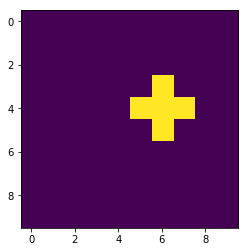

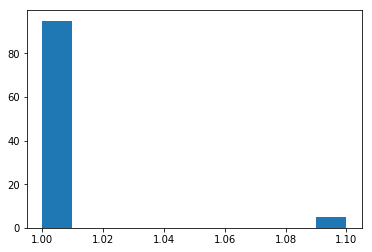

In [26]:
_in_data = np.zeros(shape=(1,10,10,1),dtype=np.float64)
_in_data[0,4,6,0] = 0.1
_in = tf.constant(_in_data)
conv_filter = tf.reshape(tf.constant([[0,1,0],[1,1,1],[0,1,0]], dtype=tf.float64), shape=(3, 3, 1))
_out = tf.nn.dilation2d(_in, conv_filter, strides=[1,1,1,1], rates=[1,1,1,1], padding='SAME')

result = _out.eval(session=tf.Session())
plt.imshow(result[0,:,:,0])
plt.show()
plt.hist(result.flatten())
plt.show()

